
# **BiotrAIn 2025 Tutorial: Data integration for microbiome research using scikit-bio**


# Section 03: Dimentionality reduction(40 min)

- Time: 8:55 - 9:30:00 EDT, Jul 11, 2025
Welcome to the practical session 01. created by Nelly Selem (Secodment host), Jeanett Daga (Secodment), with modifications by professor Qiyun Zhu (on behalf of Daniel McDonald).

🏆 QUESTIONS

What are the differences in microbial community composition between samples from distinct environments or conditions?

How choosee the metric for Beta diversity ?

🎯 AIMS

To analyze and compare the microbial community composition between samples from different environments or conditions using beta diversity metrics.

To apply UniFrac (both weighted and unweighted) as a phylogeny-based distance measure for assessing differences in microbial communities.

To visualize these differences through Non-Metric Multidimensional Scaling (NMDS) ordination plots.

🔑 KEY POINTS

Beta diversity

UniFrac

NMDS

Non-metric multidimensional scaling (NMDS)


### Background

Beta diversity measures the differences in microbial community composition between different environments or samples. It captures how distinct or similar microbial communities are across spatial or environmental gradients.

In this workshop section, we will focus on beta-diversity using:

1. Bray-Curtis dissimilarity (based on abundance data) and Jaccard index (based on presence/absence), Heatmaps to show pairwise dissimilarity or abundance patterns.

2. UniFrac, on shotgun data from the EMP500 dataset. We will apply UniFrac which is a popular phylogenetic beta-diversity metric. The similarity computed is the **uni**que **frac**tion of the phylogenetic branch length between a pair of samples.

3. Principal Coordinates Analysis (PCoA): Visualizes multivariate dissimilarities in 2D or 3D space. Samples closer together have more similar communities, and Non-metric Multidimensional Scaling (NMDS): Another ordination method for representing similarity patterns.

4. Apply PERMANOVA (Permutational Multivariate Analysis of Variance) to test for significant differences among groups of samples.

5. Last, to further explore the capabilities of scikit-bio, we will  test whether sample similarities are correlated between two prevalent phyla using both a Mantel test and Procrustes analysis.

## Preparation

Install the latest version of scikit-bio if it hasn't been (needed for every Google Colab instance).

In [36]:
from importlib.util import find_spec

In [37]:
if find_spec('skbio') is None:
    !pip install -q scikit-bio

In [3]:
import skbio
skbio.__version__

'0.6.3'

In [38]:
import pandas as pd

In [39]:
from skbio import Table
from skbio.diversity import beta_diversity




we are using the following data to make a Beta biodiversity analysis To compute and visualize beta diversity, you need:

1. Sample metadata (latam_samples.tsv): environmental metadata per sample.
2. feature table (latam_ogu.biom)counts of microbial taxa (OGUs) per sample.
3. Phylogenetic tree (latam_ogu.nwk)for UniFrac.
4. Taxonomy Taxonomy assignment file (latam_ogu.tax). for heatmaps

In [55]:
# Create a text variable to use after as a path to read files
github_data = "https://raw.githubusercontent.com/nselem/biotraintemp/refs/heads/main/data/"

In [56]:
# generate the metadata path by joining github_data_path with "emp500/sample.tsv"
latam_metadata_path = github_data + "latam/latam_samples.tsv"
latam_metadata_path
# Read the TSV file directly from the URL into a pandas DataFrame
latam_metadata_df = pd.read_csv(latam_metadata_path, sep='\t', low_memory=False, index_col='sample_name')
latam_metadata_df.head(2)

,sample_name_original,sample_type,collection_timestamp,country,depth_sample,description,elevation,emp500_principal_investigator,emp500_study_id,emp500_pi_study_id,...,env_feature,env_material,env_package,geo_loc_name,host_subject_id,host_scientific_name,latitude,longitude,project_name,scientific_name
sample_name,,,,,,,,,,,,,,,,,,,,,
13114.jensen.43.s012,Jensen43.MX12.189,sediment,07/02/2012,Mexico,15.0,Jensen43.sediment.11,0.0,Jensen,43,Jensen43,...,marine subtidal rocky reef,marine sediment,sediment,Atlantic Ocean:Northwest Atlantic Ocean:Mexica...,MX12-189,not applicable,21.02361,-86.77158,Jensen sediments from global ocean,marine sediment metagenome
13114.jensen.43.s013,Jensen43.MX12.213,sediment,07/04/2012,Mexico,15.0,Jensen43.sediment.12,0.0,Jensen,43,Jensen43,...,marine reef,marine sediment,sediment,Atlantic Ocean:Northwest Atlantic Ocean:Mexica...,MX12-213,not applicable,20.33194,-87.02712,Jensen sediments from global ocean,marine sediment metagenome


In [57]:
# prompt: generate the biom path by joining github_data_path with "emp500/sample.tsv"
latam_biom_path = github_data + "latam/shotgun/latam_ogu.biom"
latam_biom= Table.read(biom_path)
latam_df = latam_biom.to_dataframe()
latam_df = latam_df.T
latam_df.head()

,G000005825,G000006175,G000006605,G000006725,G000006745,G000006785,G000006845,G000006865,G000006925,G000006965,...,G902812375,G902812395,G902825795,G902825845,G902825965,G902826025,G902826465,G902826605,G902827015,G902827055
13114.jensen.43.s012,0,0,0,0,0,0,0,0,0,1.0,...,0,0,0,0,0,23.0,0,1.0,0,0
13114.jensen.43.s013,0,0,0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,1.0,0,0,0,0
13114.jensen.43.s014,0,0,0,0,0,0,0,0,1.0,0,...,0,0,0,0,0,0,0,0,2.0,0
13114.pinto.63.s001,0,0,0,0,0,0,0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
13114.pinto.63.s002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Bray-Curtis dissimilarity



Bray-Curtis dissimilarity is a metric that quantifies how different two ecological communities are, based on the abundance of species. It ranges from 0 to 1:

    0 = the two samples are identical in species composition and relative abundance.

    1 = the two samples share no species in common.

In microbiome our data research captures how community structure varies, not just who is present, but how abundant each microbe is. It helps identify biogeographic patterns, ecological gradients, or the effect of environmental factors (like salinity, depth, host, etc.). It’s robust to rare species and common in diversity analysis (e.g., heatmaps, clustering, PCoA).

Lets get the Bray curtis metrics from latam_df and make a data frame of the results


In [58]:
# Calculate Bray-Curtis distances
latam_bray_curtis_dm = beta_diversity("braycurtis", latam_df)

# Convert the distance matrix to a pandas DataFrame
latam_bray_curtis_df = latam_bray_curtis_dm.to_data_frame()
latam_bray_curtis_df.head(3)

,13114.jensen.43.s012,13114.jensen.43.s013,13114.jensen.43.s014,13114.pinto.63.s001,13114.pinto.63.s002,13114.pinto.63.s003,13114.pinto.63.s004,13114.pinto.63.s005,13114.pinto.63.s006,13114.pinto.63.s007,...,13114.stewart.26.s006,13114.stewart.26.s007,13114.stewart.26.s008,13114.zaneveld.9.s004,13114.zaneveld.9.s005,13114.zaneveld.9.s006,13114.zaneveld.9.s010,13114.zaneveld.9.s011,13114.zaneveld.9.s012,13114.zaneveld.9.s022
13114.jensen.43.s012,0.000000,0.867183,0.901598,0.964110,0.956639,0.975633,0.976081,0.981495,0.980003,0.979527,...,0.994312,0.997163,0.998157,0.948296,0.958420,0.952129,0.943006,0.979697,0.942797,0.994398
13114.jensen.43.s013,0.867183,0.000000,0.795822,0.977721,0.960503,0.988895,0.989959,0.992187,0.991778,0.992676,...,0.996209,0.998535,0.998917,0.965464,0.976519,0.966550,0.907557,0.928046,0.920523,0.997698
13114.jensen.43.s014,0.901598,0.795822,0.000000,0.678520,0.884550,0.939068,0.978650,0.976928,0.966732,0.912751,...,0.997457,0.999012,0.999395,0.920811,0.879102,0.897510,0.857250,0.954728,0.906540,0.998177


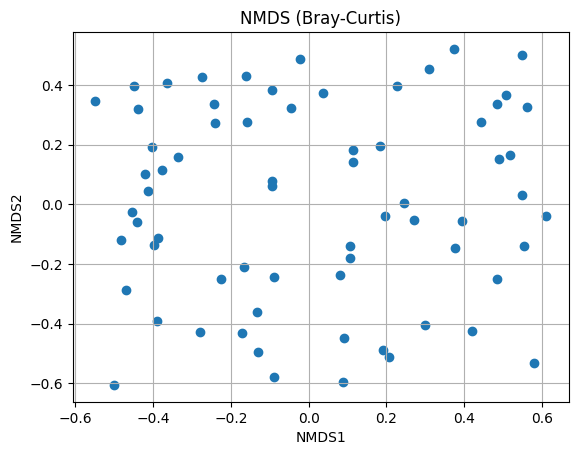

In [59]:
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

nmds = MDS(n_components=2, dissimilarity='precomputed', metric=False, random_state=42)
nmds_coords = nmds.fit_transform(latam_bray_curtis_df.values)

plt.scatter(nmds_coords[:, 0], nmds_coords[:, 1])
plt.title("NMDS (Bray-Curtis)")
plt.xlabel("NMDS1")
plt.ylabel("NMDS2")
plt.grid(True)
plt.show()

import seaborn as sns

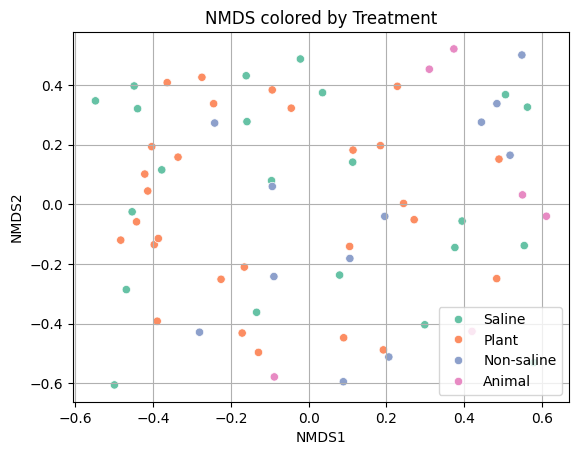

In [60]:
# in the biom_df) to filter the sample_df.
# Filter the index of bray_curtis_df to keep only sample names present in sample_df.index
valid_sample_names = latam_bray_curtis_df.index.intersection(latam_metadata_df.index)
filtered_sample_df = latam_metadata_df.loc[valid_sample_names]
sns.scatterplot(x=nmds_coords[:, 0], y=nmds_coords[:, 1],
                hue=filtered_sample_df['empo_2'], palette='Set2')
plt.title("NMDS colored by Treatment")
plt.xlabel("NMDS1")
plt.ylabel("NMDS2")
plt.legend()
plt.grid(True)
plt.show()

In [61]:
# generate the metadata path by joining github_data_path with "emp500/sample.tsv"
metadata_path = github_data + "emp500/sample.tsv"
metadata_path
# Read the TSV file directly from the URL into a pandas DataFrame
metadata_df = pd.read_csv(metadata_path, sep='\t', low_memory=False, index_col='sample_name')
metadata_df.head(2)

,sample_name_original,sample_type,collection_timestamp,country,depth_sample,description,elevation,emp500_principal_investigator,emp500_study_id,emp500_pi_study_id,...,env_feature,env_material,env_package,geo_loc_name,host_subject_id,host_scientific_name,latitude,longitude,project_name,scientific_name
sample_name,,,,,,,,,,,,,,,,,,,,,
13114.angenent.65.s001,Angenent65.misc.104,bioreactor sludge,08/09/2011 0:00,USA - New York,not applicable,Corn Beer Fermentation Bioreactor Biomass,123.0,Angenent,65,Angenent65,...,anaerobic bioreactor,anaerobic sludge,host-associated,United States of America:State of New York:Cit...,LTA.misc.104,not applicable,42.44,-76.5,Corn Beer Fermentation Bioreactor,bioreactor metagenome
13114.angenent.65.s002,Angenent65.misc.519,bioreactor sludge,9/27/12 0:00,USA - New York,not applicable,Corn Beer Fermentation Bioreactor Biomass,123.0,Angenent,65,Angenent65,...,anaerobic bioreactor,anaerobic sludge,host-associated,United States of America:State of New York:Cit...,LTA.misc.519,not applicable,42.44,-76.5,Corn Beer Fermentation Bioreactor,bioreactor metagenome


In [65]:
# prompt: generate the biom path by joining github_data_path with "emp500/sample.tsv"
biom_path = github_data + "emp500/shotgun/ogu.biom"
biom= Table.read(biom_path)
biom_df = biom.to_dataframe()
biom_df = biom_df.T
biom_df.head()

# Calculate Bray-Curtis distances
bray_curtis_dm = beta_diversity("braycurtis", biom_df)

# Convert the distance matrix to a pandas DataFrame
bray_curtis_df = bray_curtis_dm.to_data_frame()
bray_curtis_df.head(3)

,13114.angenent.65.s001,13114.angenent.65.s002,13114.angenent.65.s003,13114.angenent.65.s004,13114.angenent.65.s005,13114.angenent.65.s006,13114.angenent.65.s007,13114.angenent.65.s008,13114.angenent.65.s009,13114.berry.2.s001,...,13114.zaneveld.9.s013,13114.zaneveld.9.s014,13114.zaneveld.9.s015,13114.zaneveld.9.s016,13114.zaneveld.9.s017,13114.zaneveld.9.s018,13114.zaneveld.9.s019,13114.zaneveld.9.s020,13114.zaneveld.9.s021,13114.zaneveld.9.s022
13114.angenent.65.s001,0.000000,0.912729,0.958519,0.905751,0.866292,0.927403,0.830090,0.935140,0.957101,0.998893,...,0.999309,0.999020,0.995519,0.998613,0.999014,0.999694,0.999792,0.999056,0.999495,0.999612
13114.angenent.65.s002,0.912729,0.000000,0.963464,0.925959,0.924527,0.936963,0.879782,0.948168,0.706090,0.999127,...,0.999363,0.999292,0.995438,0.998794,0.999072,0.999661,0.999724,0.999173,0.999594,0.999598
13114.angenent.65.s003,0.958519,0.963464,0.000000,0.482088,0.823006,0.419026,0.706358,0.424648,0.958123,0.995494,...,0.995531,0.995030,0.995806,0.990724,0.995583,0.997104,0.997723,0.994066,0.999781,0.999712


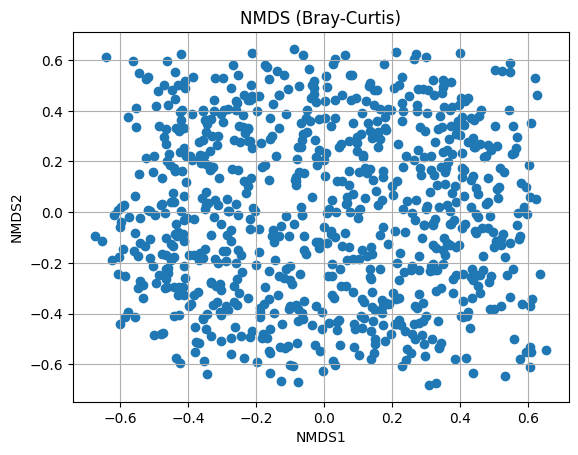

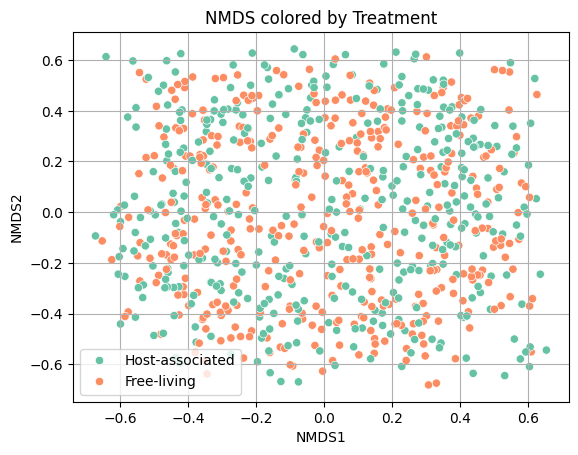

In [68]:
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

nmds = MDS(n_components=2, dissimilarity='precomputed', metric=False, random_state=42)
nmds_coords = nmds.fit_transform(bray_curtis_df.values)

plt.scatter(nmds_coords[:, 0], nmds_coords[:, 1])
plt.title("NMDS (Bray-Curtis)")
plt.xlabel("NMDS1")
plt.ylabel("NMDS2")
plt.grid(True)
plt.show()

import seaborn as sns
# in the biom_df) to filter the sample_df.
# Filter the index of bray_curtis_df to keep only sample names present in sample_df.index
valid_sample_names = bray_curtis_df.index.intersection(metadata_df.index)
filtered_sample_df = metadata_df.loc[valid_sample_names]
sns.scatterplot(x=nmds_coords[:, 0], y=nmds_coords[:, 1],
                hue=filtered_sample_df['empo_1'], palette='Set2')
plt.title("NMDS colored by Treatment")
plt.xlabel("NMDS1")
plt.ylabel("NMDS2")
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-70-10c172d071c1>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.xlabel(f"PC1 ({pcoa_latam.proportion_explained[0]:.2f}%)")
<ipython-input-70-10c172d071c1>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.ylabel(f"PC2 ({pcoa_latam.proportion_explained[1]:.2f}%)")


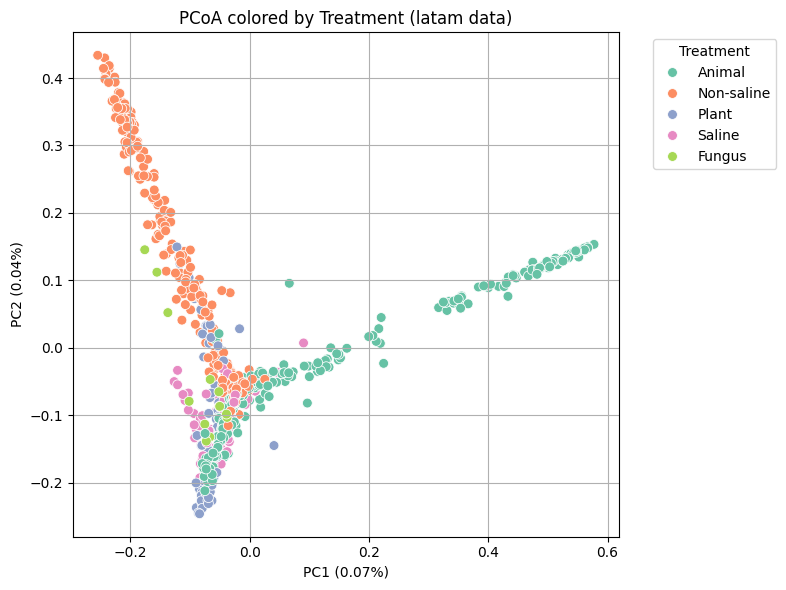

<ipython-input-70-10c172d071c1>:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.xlabel(f"PC1 ({pcoa_emp500.proportion_explained[0]:.2f}%)")
<ipython-input-70-10c172d071c1>:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.ylabel(f"PC2 ({pcoa_emp500.proportion_explained[1]:.2f}%)")


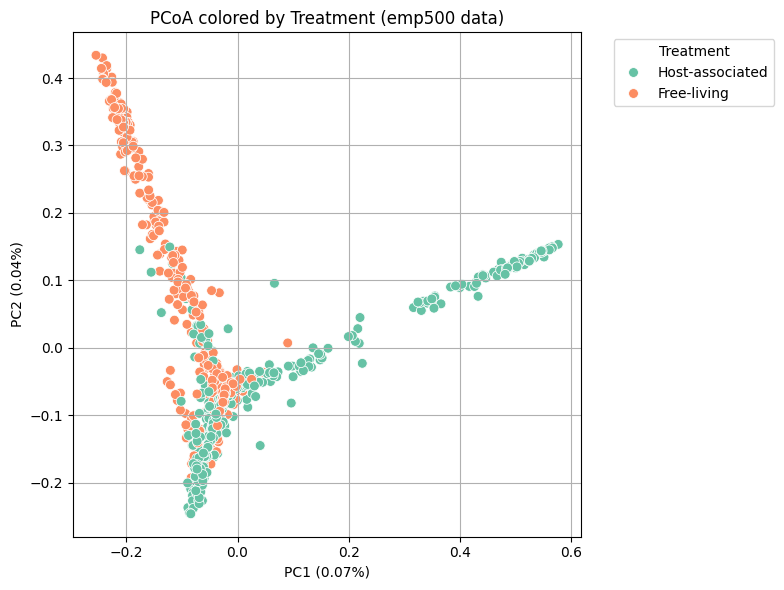

In [70]:
# prompt: instead of NMDS use PcoA

import matplotlib.pyplot as plt
from skbio.stats.ordination import pcoa

# latam data
pcoa_latam = pcoa(bray_curtis_dm)

# Plotting the PCoA results for latam data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pcoa_latam.samples['PC1'], y=pcoa_latam.samples['PC2'],
                hue=filtered_sample_df['empo_2'], palette='Set2', s=50) # s is marker size
plt.title("PCoA colored by Treatment (latam data)")
plt.xlabel(f"PC1 ({pcoa_latam.proportion_explained[0]:.2f}%)")
plt.ylabel(f"PC2 ({pcoa_latam.proportion_explained[1]:.2f}%)")
plt.legend(title="Treatment", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout() # Adjust layout to prevent legend clipping
plt.show()


# emp500 data
pcoa_emp500 = pcoa(bray_curtis_dm)

# Plotting the PCoA results for emp500 data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pcoa_emp500.samples['PC1'], y=pcoa_emp500.samples['PC2'],
                hue=filtered_sample_df['empo_1'], palette='Set2', s=50) # s is marker size
plt.title("PCoA colored by Treatment (emp500 data)")
plt.xlabel(f"PC1 ({pcoa_emp500.proportion_explained[0]:.2f}%)")
plt.ylabel(f"PC2 ({pcoa_emp500.proportion_explained[1]:.2f}%)")
plt.legend(title="Treatment", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout() # Adjust layout to prevent legend clipping
plt.show()


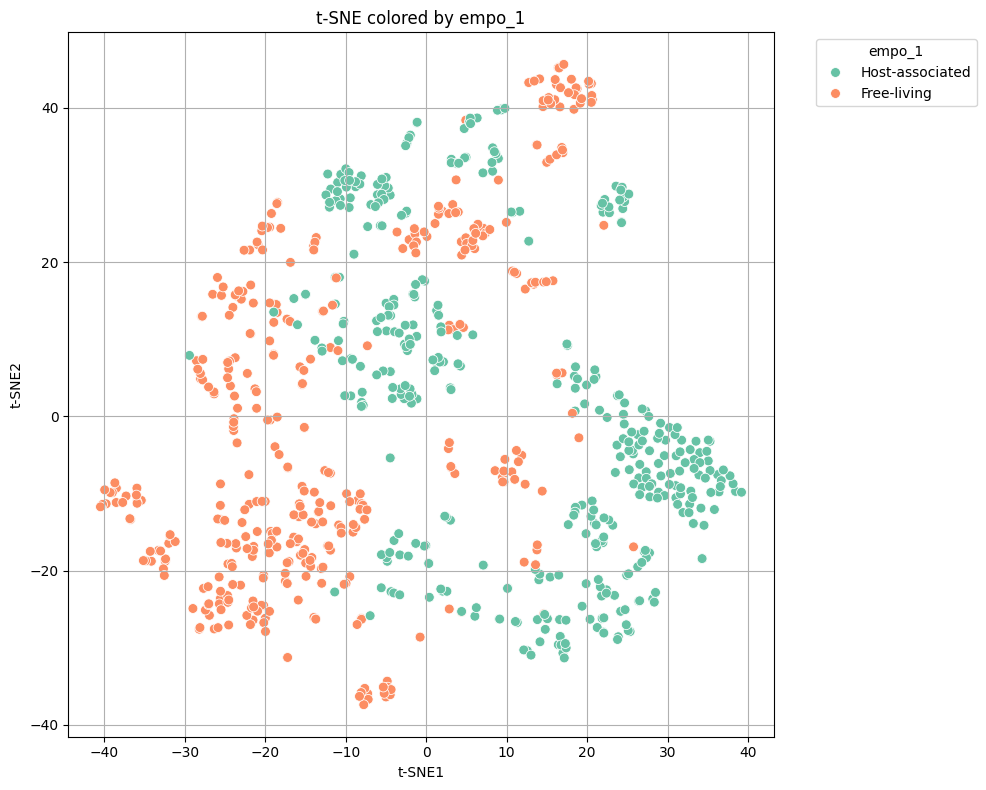

In [78]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure metadata_df and bray_curtis_df are loaded and available
# (Assuming they are loaded from the previous code blocks)

# Filter the index of bray_curtis_df to keep only sample names present in metadata_df.index
valid_sample_names = bray_curtis_df.index.intersection(metadata_df.index)
filtered_metadata_df = metadata_df.loc[valid_sample_names]

# Further filter the bray_curtis_df to match the filtered metadata
filtered_bray_curtis_df = bray_curtis_df.loc[valid_sample_names, valid_sample_names]


tsne = TSNE(n_components=2, metric="precomputed", init="random", random_state=42)
# Use the filtered distance matrix for t-SNE
tsne_coords = tsne.fit_transform(filtered_bray_curtis_df.values)

plt.figure(figsize=(10, 8)) # Optional: Increase figure size for better readability
sns.scatterplot(x=tsne_coords[:, 0], y=tsne_coords[:, 1],
                hue=filtered_metadata_df['empo_1'], palette='Set2', s=50) # s is marker size

plt.title("t-SNE colored by empo_1")
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.legend(title="empo_1", bbox_to_anchor=(1.05, 1), loc='upper left') # Adjust legend position
plt.grid(True)
plt.tight_layout() # Adjust layout to prevent legend clipping
plt.show()

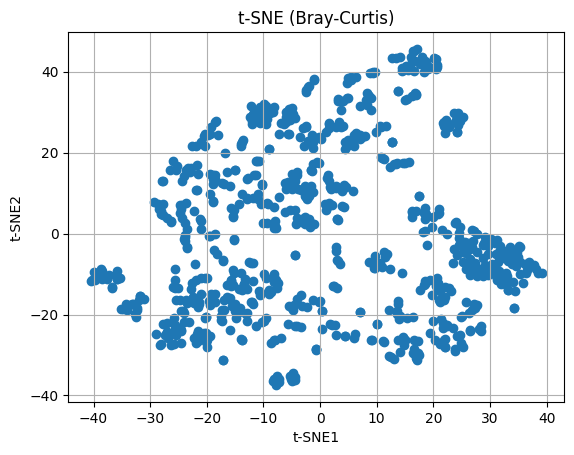

In [72]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, metric="precomputed", init="random", random_state=42)
tsne_coords = tsne.fit_transform(bray_curtis_df.values)

plt.scatter(tsne_coords[:, 0], tsne_coords[:, 1])
plt.title("t-SNE (Bray-Curtis)")
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.grid(True)
plt.show()